<a href="https://colab.research.google.com/github/Jiya-786/ML_notes/blob/main/O'REILLY's%20Hands-on%20Machine%20Learning/End_to_End_ML_project(hands_on_ML_ch2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Creating the dataset-

In [ ]:
housing=pd.read_csv(r"C:\Users\JIYA\Downloads\housing.csv")

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# .info()-

In [ ]:
housing.info()
# There are 20,640 instances in the dataset, which means that it is fairly small by
# Machine Learning standards, but it’s perfect to get started. Notice that the total_bed
# rooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐
# ing this feature. We will need to take care of this later.

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


# .value_counts()-

In [ ]:
# All attributes are numerical, except the ocean_proximity field. Its type is object, so it
# could hold any kind of Python object, but since you loaded this data from a CSV file
# you know that it must be a text attribute. When you looked at the top five rows, you
# probably noticed that the values in the ocean_proximity column were repetitive,
# which means that it is probably a categorical attribute. You can find out what cate‐
# gories exist and how many districts belong to each category by using the
# value_counts() method:
housing['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# .describe()-

In [ ]:
housing.describe()
# The describe() method shows a summary of the numerical attributes

# The count, mean, min, and max rows are self-explanatory. Note that the null values are
# ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). The std
# row shows the standard deviation, which measures how dispersed the values are.12
# The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indi‐
# cates the value below which a given percentage of observations in a group of observa‐
# tions falls. For example, 25% of the districts have a housing_median_age lower than
# 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
# 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histograms-

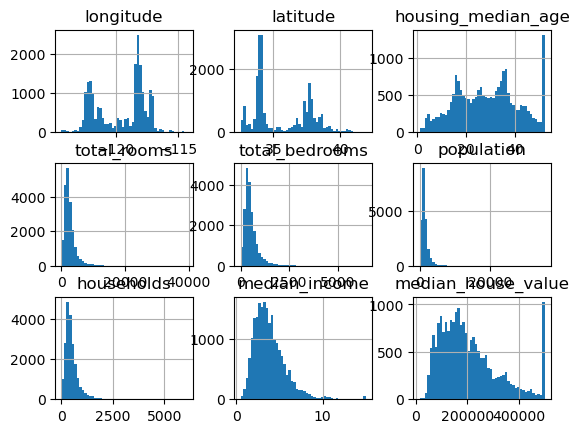

In [ ]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a
# histogram for each numerical attribute. A histogram shows the number of instances
# (on the vertical axis) that have a given value range (on the horizontal axis). You can
# either plot this one attribute at a time, or you can call the hist() method on the
# whole dataset, and it will plot a histogram for each numerical attribute (see
# Figure 2-8). For example, you can see that slightly over 800 districts have a
# median_house_value equal to about $100,000.

# this works only in jupyter notebook, it helps plot graphs within this window

%matplotlib inline

# The hist() method relies on Matplotlib, which in turn relies on a
# user-specified graphical backend to draw on your screen. So before
# you can plot anything, you need to specify which backend Matplot‐
# lib should use. The simplest option is to use Jupyter’s magic com‐
# mand %matplotlib inline. This tells Jupyter to set up Matplotlib
# so it uses Jupyter’s own backend. Plots are then rendered within the
# notebook itself. Note that calling show() is optional in a Jupyter
# notebook, as Jupyter will automatically display plots when a cell is
# executed.

housing.hist(bins=50)
plt.show()


# Notice a few things in these histograms-

In [ ]:

# 1. First, the median income attribute does not look like it is expressed in US dollars
# (USD). After checking with the team that collected the data, you are told that the
# data has been scaled and capped at 15 (actually 15.0001) for higher median
# incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
# represent roughly tens of thousands of dollars (e.g., 3 actually means about
# $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the
# data was computed.


In [ ]:
#  The housing median age and the median house value were also capped. The lat‐
# ter may be a serious problem since it is your target attribute (your labels). Your
# Machine Learning algorithms may learn that prices never go beyond that limit.
# You need to check with your client team (the team that will use your system’s out‐
# put) to see if this is a problem or not. If they tell you that they need precise pre‐
# dictions even beyond $500,000, then you have mainly two options:
# a. Collect proper labels for the districts whose labels were capped.
# b. Remove those districts from the training set (and also from the test set, since
# your system should not be evaluated poorly if it predicts values beyond
# $500,000).

In [ ]:
# 3. These attributes have very different scales. We will discuss this later in this chap‐
# ter when we explore feature scaling.

In [ ]:
# 4. Finally, many histograms are tail heavy: they extend much farther to the right of
# the median than to the left. This may make it a bit harder for some Machine
# Learning algorithms to detect patterns. We will try transforming these attributes
# later on to have more bell-shaped distributions.

# Create a test set-

In [ ]:
# Wait! Before you look at the data any further, you need to create a
# test set, put it aside, and never look at it.

In [ ]:
# It may sound strange to voluntarily set aside part of the data at this stage. After all,
# you have only taken a quick glance at the data, and surely you should learn a whole
# lot more about it before you decide what algorithms to use, right? This is true, but
# your brain is an amazing pattern detection system, which means that it is highly
# prone to overfitting: if you look at the test set, you may stumble upon some seemingly
# interesting pattern in the test data that leads you to select a particular kind of
# Machine Learning model. When you estimate the generalization error using the test
# set, your estimate will be too optimistic and you will launch a system that will not
# perform as well as expected. This is called data snooping bias.

In [ ]:
# Creating a test set is theoretically quite simple: just pick some instances randomly,
# typically 20% of the dataset (or less if your dataset is very large), and set them aside

In [ ]:
# Scikit-Learn provides a few functions to split datasets into multiple subsets in various
# ways. The simplest function is train_test_split, which does pretty much the same
# thing as the function split_train_test defined earlier, with a couple of additional
# features. First there is a random_state parameter that allows you to set the random
# generator seed as explained previously, and second you can pass it multiple datasets
# with an identical number of rows, and it will split them on the same indices (this is
# very useful, for example, if you have a separate DataFrame for labels):


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

# Stratified split-

In [ ]:
# So far we have considered purely random sampling methods. This is generally fine if
# your dataset is large enough (especially relative to the number of attributes), but if it
# is not, you run the risk of introducing a significant sampling bias. When a survey
# company decides to call 1,000 people to ask them a few questions, they don’t just pick
# 1,000 people randomly in a phone book. They try to ensure that these 1,000 people
# are representative of the whole population. For example, the US population is com‐
# posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
# try to maintain this ratio in the sample: 513 female and 487 male. This is called strati‐
# fied sampling: the population is divided into homogeneous subgroups called strata,
# and the right number of instances is sampled from each stratum to guarantee that the
# test set is representative of the overall population. If they used purely random sam‐
# pling, there would be about 12% chance of sampling a skewed test set with either less
# than 49% female or more than 54% female. Either way, the survey results would be
# significantly biased.

In [ ]:
# Suppose you chatted with experts who told you that the median income is a very
# important attribute to predict median housing prices. You may want to ensure that
# the test set is representative of the various categories of incomes in the whole dataset.
# Since the median income is a continuous numerical attribute, you first need to create
# an income category attribute. Let’s look at the median income histogram more closely:


(array([  50.,  163.,  347.,  675., 1012., 1341., 1363., 1592., 1524.,
        1616., 1513., 1259., 1401.,  990.,  935.,  812.,  715.,  582.,
         398.,  483.,  310.,  280.,  168.,  147.,  155.,  137.,  109.,
          86.,   60.,   36.,   28.,   23.,   33.,   58.,   36.,   35.,
          27.,   10.,   14.,    7.,   12.,   10.,    7.,    8.,   10.,
           4.,    2.,    3.,    2.,   52.]),
 array([ 0.4999  ,  0.789904,  1.079908,  1.369912,  1.659916,  1.94992 ,
         2.239924,  2.529928,  2.819932,  3.109936,  3.39994 ,  3.689944,
         3.979948,  4.269952,  4.559956,  4.84996 ,  5.139964,  5.429968,
         5.719972,  6.009976,  6.29998 ,  6.589984,  6.879988,  7.169992,
         7.459996,  7.75    ,  8.040004,  8.330008,  8.620012,  8.910016,
         9.20002 ,  9.490024,  9.780028, 10.070032, 10.360036, 10.65004 ,
        10.940044, 11.230048, 11.520052, 11.810056, 12.10006 , 12.390064,
        12.680068, 12.970072, 13.260076, 13.55008 , 13.840084, 14.130088,
        

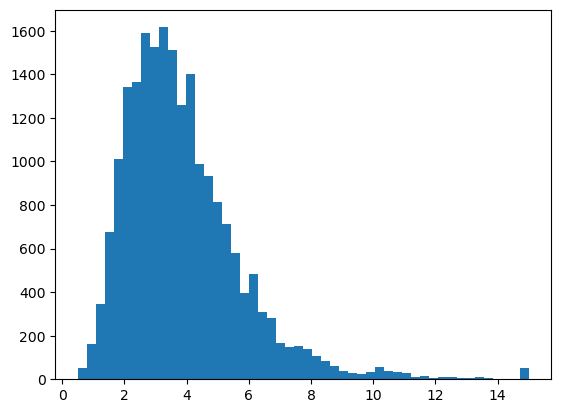

In [ ]:
plt.hist(housing['median_income'],bins=50)

In [ ]:
# most median income values are clustered around 1.5 to 6 (i.e.,
# $15,000–$60,000), but some median incomes go far beyond 6. It is important to have
# a sufficient number of instances in your dataset for each stratum, or else the estimate
# of the stratum’s importance may be biased. This means that you should not have too
# many strata, and each stratum should be large enough. The following code uses the
# pd.cut() function to create an income category attribute with 5 categories (labeled
# from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
# 1.5 to 3, and so on:

In [ ]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.,4.5,6.,np.inf],labels=[1,2,3,4,5])

<Axes: >

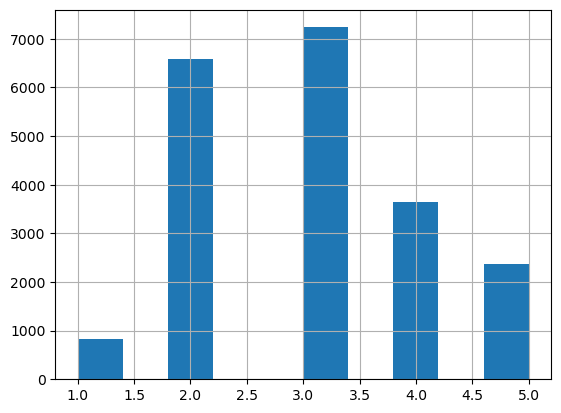

In [ ]:
housing['income_cat'].hist()

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

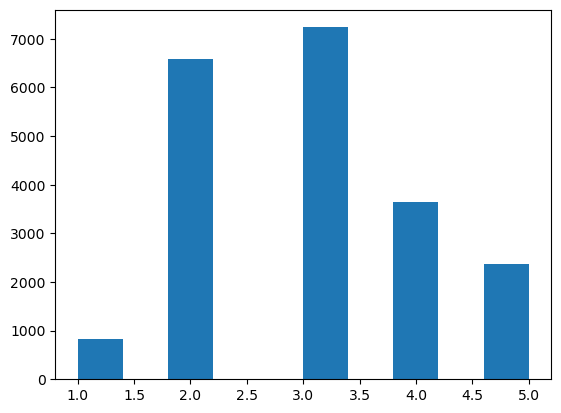

In [ ]:
plt.hist(housing['income_cat'])

In [ ]:
# Now you are ready to do stratified sampling based on the income category. For this
# you can use Scikit-Learn’s StratifiedShuffleSplit class:


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [ ]:
# Let’s see if this worked as expected. You can start by looking at the income category
# proportions in the test set:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
# With similar code you can measure the income category proportions in the full data‐
# set. Figure 2-10 compares the income category proportions in the overall dataset, in
# the test set generated with stratified sampling, and in a test set generated using purely
# random sampling. As you can see, the test set generated using stratified sampling has
# income category proportions almost identical to those in the full dataset, whereas the
# test set generated using purely random sampling is quite skewed.

In [ ]:
# Now you should remove the income_cat attribute so the data is back to its original
# state:

In [ ]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)


In [ ]:
# We spent quite a bit of time on test set generation for a good reason: this is an often
# neglected but critical part of a Machine Learning project. Moreover, many of these
# ideas will be useful later when we discuss cross-validation. Now it’s time to move on
# to the next stage: exploring the data.

# Discover and visualize the data to gain insights-

In [ ]:
# So far you have only taken a quick glance at the data to get a general understanding of
# the kind of data you are manipulating. Now the goal is to go a little bit more in depth.
# First, make sure you have put the test set aside and you are only exploring the train‐
# ing set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can
# just work directly on the full set. Let’s create a copy so you can play with it without
# harming the training set:

In [ ]:
housing=strat_train_set.copy()

In [ ]:
# Since there is geographical information (latitude and longitude), it is a good idea to
# create a scatterplot of all districts to visualize the data

<Axes: xlabel='longitude', ylabel='latitude'>

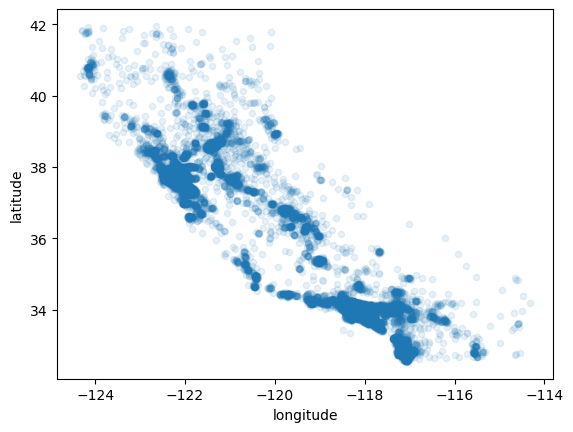

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [ ]:
# This looks like California all right, but other than that it is hard to see any particular
# pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
# where there is a high density of data points

# More generally, our brains are very good at spotting patterns on pictures, but you
# may need to play around with visualization parameters to make the patterns stand
# out.

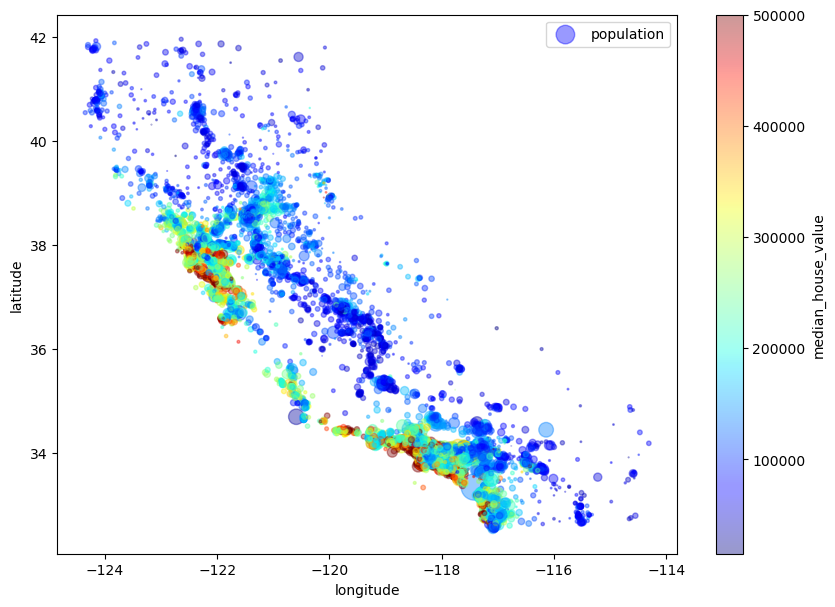

In [ ]:
# More generally, our brains are very good at spotting patterns on pictures, but you
# may need to play around with visualization parameters to make the patterns stand
# out.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# here s is used for size of each dot and c is used for color.
# cmap transforms each color according to values

# Looking for correlations-

In [ ]:
# Since the dataset is not too large, you can easily compute the standard correlation
# coefficient (also called Pearson’s r) between every pair of attributes using the corr()
# method:


In [ ]:
corr_matrix=housing.drop('ocean_proximity',axis=1).corr()
display(corr_matrix)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [ ]:
# Now let’s look at how much each attribute correlates with the median house value:

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [ ]:
# The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
# there is a strong positive correlation; for example, the median house value tends to go
# up when the median income goes up. When the coefficient is close to –1, it means
# that there is a strong negative correlation; you can see a small negative correlation
# between the latitude and the median house value (i.e., prices have a slight tendency to
# go down when you go north). Finally, coefficients close to zero mean that there is no
# linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐
# cient between their horizontal and vertical axes.

In [ ]:
# The correlation coefficient only measures linear correlations (“if x
# goes up, then y generally goes up/down”). It may completely miss
# out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
# erally goes up”). Note how all the plots of the bottom row have a
# correlation coefficient equal to zero despite the fact that their axes
# are clearly not independent: these are examples of nonlinear rela‐
# tionships. Also, the second row shows examples where the correla‐
# tion coefficient is equal to 1 or –1; notice that this has nothing to
# do with the slope. For example, your height in inches has a correla‐
# tion coefficient of 1 with your height in feet or in nanometers

# Correlation using graphs-

In [ ]:
# Another way to check for correlation between attributes is to use Pandas’
# scatter_matrix function, which plots every numerical attribute against every other
# numerical attribute. Since there are now 11 numerical attributes, you would get 112
#  =
# 121 plots, which would not fit on a page, so let’s just focus on a few promising
# attributes that seem most correlated with the median housing value (Figure 2-15):

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

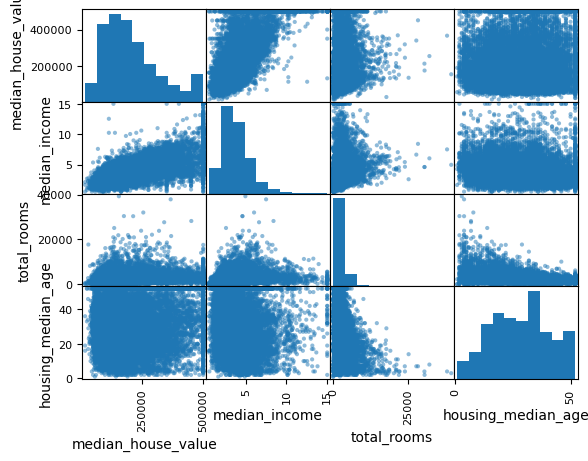

In [ ]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes])


In [ ]:
# The main diagonal (top left to bottom right) would be full of straight lines if Pandas
# plotted each variable against itself, which would not be very useful. So instead Pandas
# displays a histogram of each attribute (other options are available; see Pandas’ docu‐
# mentation for more details).

In [ ]:
# The most promising attribute to predict the median house value is the median
# income, so let’s zoom in on their correlation scatterplot (Figure 2-16):

<Axes: xlabel='median_income', ylabel='median_house_value'>

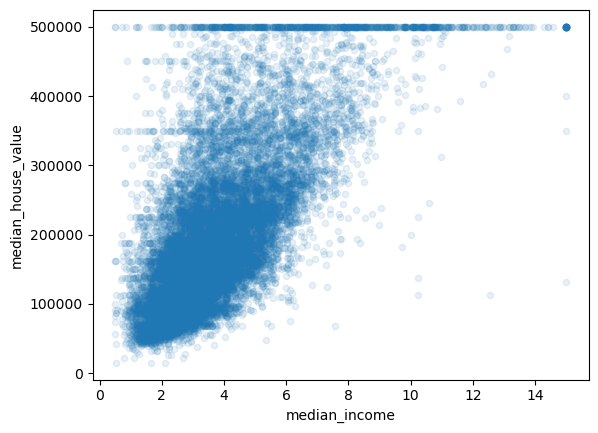

In [ ]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [ ]:
# This plot reveals a few things. First, the correlation is indeed very strong; you can
# clearly see the upward trend and the points are not too dispersed. Second, the price
# cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this
# plot reveals other less obvious straight lines: a horizontal line around $450,000,
# another around $350,000, perhaps one around $280,000, and a few more below that.
# You may want to try removing the corresponding districts to prevent your algorithms
# from learning to reproduce these data quirks.


# Experimenting with attribute combinations-

In [ ]:
# You identified a few data quirks that you may want to clean up
# before feeding the data to a Machine Learning algorithm, and you found interesting
# correlations between attributes, in particular with the target attribute. You also
# noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
# form them (e.g., by computing their logarithm). Of course, your mileage will vary
# considerably with each project, but the general ideas are similar.


In [ ]:
# One last thing you may want to do before actually preparing the data for Machine
# Learning algorithms is to try out various attribute combinations. For example, the
# total number of rooms in a district is not very useful if you don’t know how many
# households there are. What you really want is the number of rooms per household.
# Similarly, the total number of bedrooms by itself is not very useful: you probably
# want to compare it to the number of rooms. And the population per household also
# seems like an interesting attribute combination to look at. Let’s create these new
# attributes

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
# And now let’s look at the correlation matrix again:

In [ ]:
corr_matrix = housing.drop('ocean_proximity',axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
# Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
# the median house value than the total number of rooms or bedrooms. Apparently
# houses with a lower bedroom/room ratio tend to be more expensive. The number of
# rooms per household is also more informative than the total number of rooms in a
# district—obviously the larger the houses, the more expensive they are.
# This round of exploration does not have to be absolutely thorough; the point is to
# start off on the right foot and quickly gain insights that will help you get a first rea‐
# sonably good prototype. But this is an iterative process: once you get a prototype up
# and running, you can analyze its output to gain more insights and come back to this
# exploration step.

# Preparing the data for machine learning algorithms-

## Data Cleaning-

In [ ]:
# Most Machine Learning algorithms cannot work with missing features, so let’s create
# a few functions to take care of them. You noticed earlier that the total_bedrooms
# attribute has some missing values, so let’s fix this. You have three options:
# • Get rid of the corresponding districts.
# • Get rid of the whole attribute.
# • Set the values to some value (zero, the mean, the median, etc.).
# You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
# methods:

In [ ]:
# obvio can't use all of thos together, we need to use either of these methods

housing.dropna(subset=["total_bedrooms"],inplace=True)
# (OR)
housing=housing.dropna(subset=['total_bedrooms',inplace=True)
# 👉 Removes rows where total_bedrooms is missing (NaN)
# 👉 Keeps all other rows, even if other columns have NaNs

housing=housing.drop("total_bedrooms",axis=1)

median=housing['total_bedrooms'].median()
housing['total_bedrooms']=housing['total_bedrooms'].fillna(median,inplace=True)
# what inplace=True does-
# 👉 Modify the original DataFrame directly
# 👉 Do not return a new DataFrame

C:\Users\JIYA\AppData\Local\Temp\ipykernel_88212\639356764.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  housing['total_bedrooms']=housing['total_bedrooms'].fillna(median,inplace=True)


In [ ]:
# If you choose option 3, you should compute the median value on the training set, and
# use it to fill the missing values in the training set, but also don’t forget to save the
# median value that you have computed. You will need it later to replace missing values
# in the test set when you want to evaluate your system, and also once the system goes
# live to replace missing values in new data.

In [ ]:
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
# Here is how to use it. First, you need to create a SimpleImputer instance, specifying
# that you want to replace each attribute’s missing values with the median of that
# attribute:

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [ ]:
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity:

In [ ]:
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable. Only the total_bedrooms attribute had missing
# values, but we cannot be sure that there won’t be any missing values in new data after
# the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [ ]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [ ]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [ ]:
# Now you can use this “trained” imputer to transform the training set by replacing
# missing values by the learned medians:

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
# The result is a plain NumPy array containing the transformed features. If you want to
# put it back into a Pandas DataFrame, it’s simple:

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# Feature scaling-

In [ ]:
# One of the most important transformations you need to apply to your data is feature
# scaling. With few exceptions, Machine Learning algorithms don’t perform well when
# the input numerical attributes have very different scales. This is the case for the hous‐
# ing data: the total number of rooms ranges from about 6 to 39,320, while the median
# incomes only range from 0 to 15. Note that scaling the target values is generally not
# required.
# There are two common ways to get all attributes to have the same scale: min-max
# scaling and standardization.

In [ ]:
# Min-max scaling (many people call this normalization) is quite simple: values are
# shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
# ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter
# that lets you change the range if you don’t want 0–1 for some reason.

In [ ]:
# Standardization is quite different: first it subtracts the mean value (so standardized
# values always have a zero mean), and then it divides by the standard deviation so that
# the resulting distribution has unit variance. Unlike min-max scaling, standardization
# does not bound values to a specific range, which may be a problem for some algo‐
# rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐
# ever, standardization is much less affected by outliers. For example, suppose a district
# had a median income equal to 100 (by mistake). Min-max scaling would then crush
# all the other values from 0–15 down to 0–0.15, whereas standardization would not be
# much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.


In [ ]:
# As with all the transformations, it is important to fit the scalers to
# the training data only, not to the full dataset (including the test set).
# Only then can you use them to transform the training set and the
# test set (and new data).